In [267]:
import pandas as pd
import geopandas
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error, ConfusionMatrixDisplay, roc_curve, auc, r2_score
from sklearn.model_selection import train_test_split

In [268]:
article_df = pd.read_csv('articleInfo.csv')
author_df = pd.read_csv('authorInfo.csv')
combined_df = pd.merge(article_df, author_df, on = 'Article No.')
combined_df.fillna(0, inplace=True)

Text(0, 0.5, 'No. of Articles')

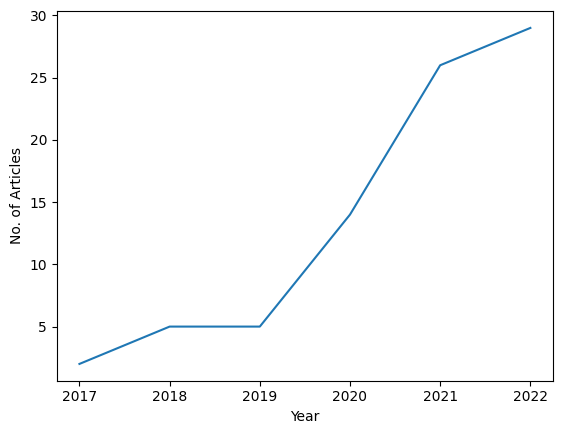

In [269]:
dombined_df = combined_df.drop_duplicates(subset='Title')
count = dombined_df.groupby('Year').count()['Title']
count
yearly_publication = count.plot()
yearly_publication.set_xlabel('Year')
yearly_publication.set_ylabel('No. of Articles')

C:\Users\jiang\AppData\Local\Temp\ipykernel_11800\3169940324.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ycount = combined_df.groupby('Year').sum()['Citation']


Text(0, 0.5, 'No. of Citations')

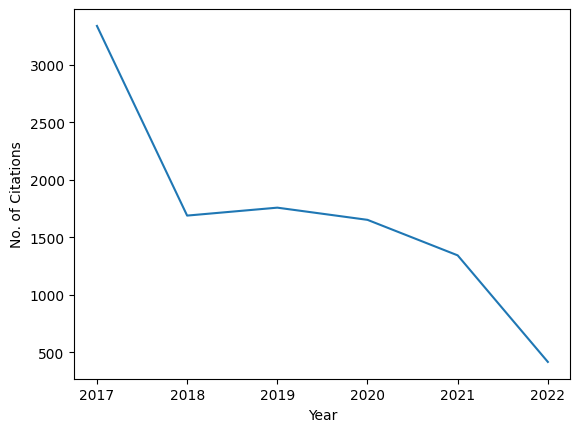

In [270]:
ycount = combined_df.groupby('Year').sum()['Citation']
ycount
yearly_citation = ycount.plot()
yearly_citation.set_xlabel('Year')
yearly_citation.set_ylabel('No. of Citations')

<Axes: >

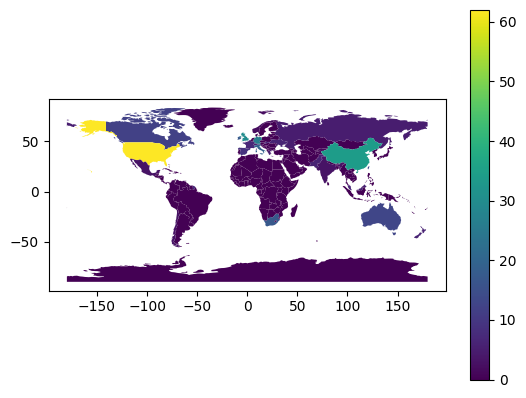

In [271]:
xcount = combined_df.groupby('Country').count()['Title'].drop(0)
xcount
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.rename(index={'United States of America':'USA'}, inplace=True)
world
world_map = world.merge(xcount, left_on = 'name', right_on = 'Country', how = 'left')
world_map.fillna(0, inplace=True)
world_map.plot(column = 'Title', legend=True)

In [272]:
x = combined_df['Author Affiliation'].value_counts().nlargest(5)
x

University of the Western Cape    17
Masaryk University                12
University College Cork           11
Intel Corporation                 11
Madigan Army Medical Center        8
Name: Author Affiliation, dtype: int64

In [273]:
researchers = combined_df.groupby('Author Name').sum()['h-index'].drop(0)
highest = researchers.sort_values(ascending=False)
highest


C:\Users\jiang\AppData\Local\Temp\ipykernel_11800\1668009515.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  researchers = combined_df.groupby('Author Name').sum()['h-index'].drop(0)


Author Name
Ulrich Trautwein         95.0
Nicolas Molinari         63.0
George S. Athwal         59.0
Sellappan Palaniappan    48.0
Maria Luisa Lorusso      33.0
                         ... 
Jialin Wang               0.0
Jezabel Sánchez-Oneto     0.0
Jeremy Bailenson          0.0
Jens-Uwe Hahn \n          0.0
Švedová, Hana             0.0
Name: h-index, Length: 380, dtype: float64

In [274]:
df = pd.read_csv('data.csv')
df = df.drop(df.columns[6], axis = 1)
# df.Purchase = df.Purchase.map({1 : 'Yes', 0 : 'No'})
# df.Gender = df.Gender.map({0 : 'Female', 1 : 'Male'})
x = df.drop(df.columns[1], axis = 1)
y = df['SUS']
x_train, x_test, y_train, y_test = train_test_split(x, y)
model = LinearRegression()
model.fit(x_train, y_train)
results = pd.DataFrame(model.coef_, x.columns, columns = ['Coeffcients'])
display(results)
predictions = model.predict(x_test)
mean_squared = mean_squared_error(y_test, predictions)
print(mean_squared)


x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

,Coeffcients
Purchase,3.232931
Duration,0.001739
Gender,2.283127
ASR_Error,-1.386263
Intent_Error,-1.609691


106.85767485654866
                            OLS Regression Results                            
Dep. Variable:                    SUS   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     27.39
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           5.25e-17
Time:                        21:27:31   Log-Likelihood:                -362.39
No. Observations:                 100   AIC:                             736.8
Df Residuals:                      94   BIC:                             752.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           93.0282      

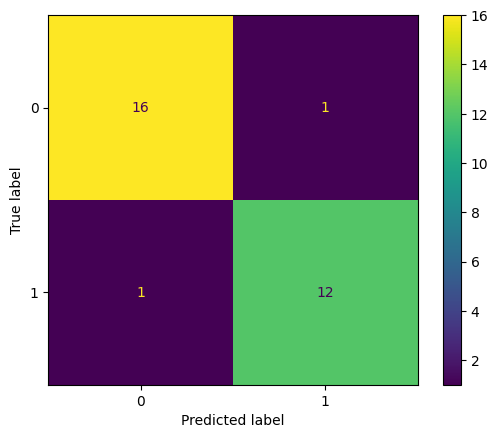

0.9333333333333333 0.9230769230769231 0.9230769230769231 0.9230769230769231
0.904977375565611


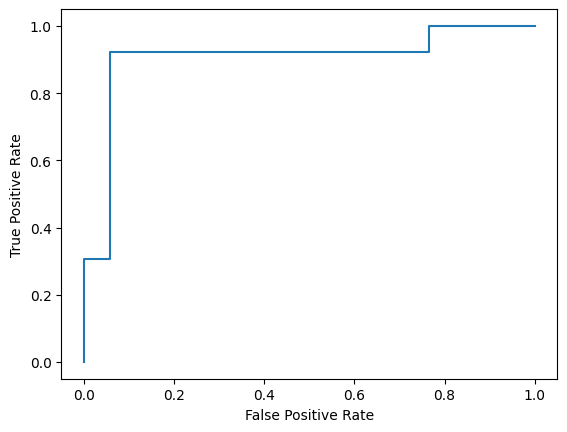

In [275]:

df = df.drop(df.columns[1], axis = 1)
x = df.drop(df.columns[0], axis = 1)
y = df['Purchase']
scale = StandardScaler()
x = scale.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3)
mod_logistic = LogisticRegression()
mod_logistic.fit(x_train, y_train)
pred_l = mod_logistic.predict(x_test)
cml = confusion_matrix(y_test, pred_l)
disp = ConfusionMatrixDisplay(confusion_matrix=cml, display_labels=mod_logistic.classes_)
disp.plot()
plt.show()

tn, fp, fn, tp = cml.ravel()
n = tp + tn + fp + fn
accuracy = (tp + tn) / n
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)
print(accuracy, precision, recall, f1)

pred_l = mod_logistic.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, pred_l)
aucl = auc(fpr, tpr)
print(aucl)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

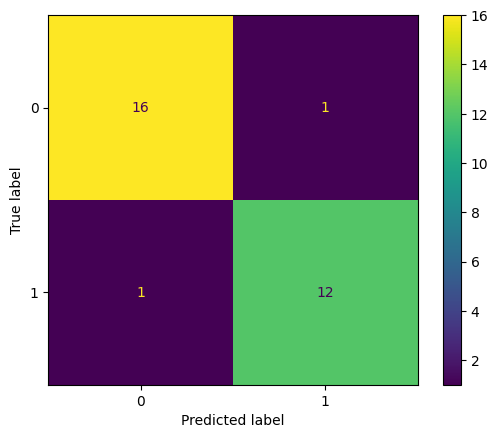

0.9333333333333333 0.9230769230769231 0.9230769230769231 0.9230769230769231
0.9321266968325793


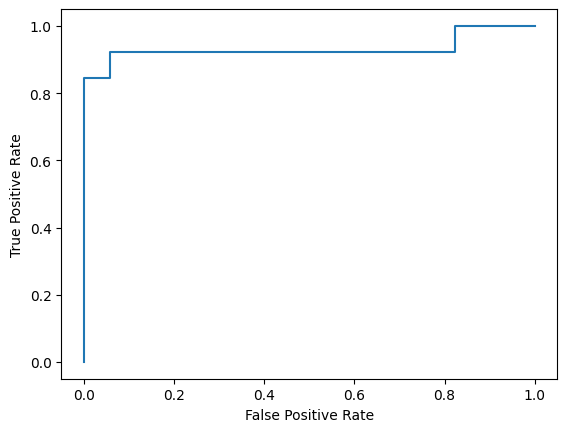

In [276]:
mod_svm = SVC(probability = True)
mod_svm.fit(x_train,y_train)
pred_s = mod_svm.predict(x_test)
cms = confusion_matrix(y_test, pred_s)
disp = ConfusionMatrixDisplay(confusion_matrix=cms, display_labels=mod_svm.classes_)
disp.plot()
plt.show()

tn, fp, fn, tp = cms.ravel()
n = tp + tn + fp + fn
accuracy = (tp + tn) / n
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)
print(accuracy, precision, recall, f1)

pred_s = mod_svm.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, pred_s)
aucs = auc(fpr, tpr)
print(aucs)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

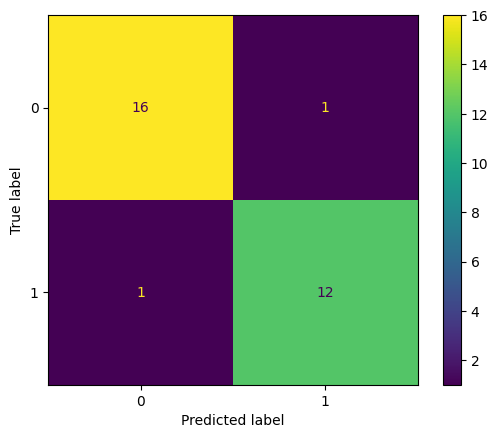

0.9333333333333333 0.9230769230769231 0.9230769230769231 0.9230769230769231
0.9366515837104072


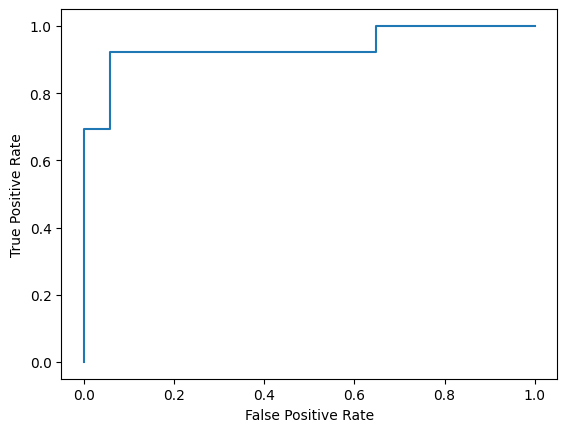

In [277]:
mod_naive = GaussianNB()
mod_naive.fit(x_train, y_train)
pred_n = mod_naive.predict(x_test)
cmn = confusion_matrix(y_test, pred_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cmn, display_labels=mod_naive.classes_)
disp.plot()
plt.show()
tn, fp, fn, tp = cmn.ravel()
n = tp + tn + fp + fn
accuracy = (tp + tn) / n
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)
print(accuracy, precision, recall, f1)

pred_n = mod_naive.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, pred_n)
aucn = auc(fpr, tpr)
print(aucn)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

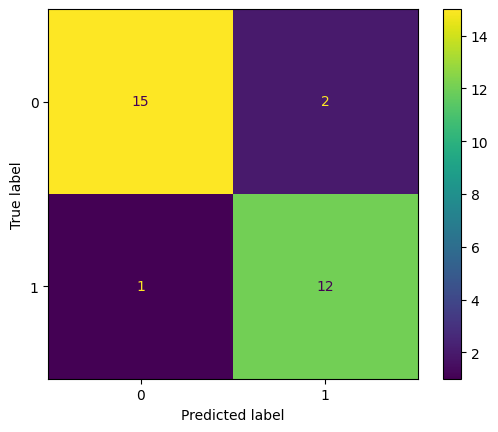

0.9 0.8571428571428571 0.9230769230769231 0.888888888888889
0.9457013574660633


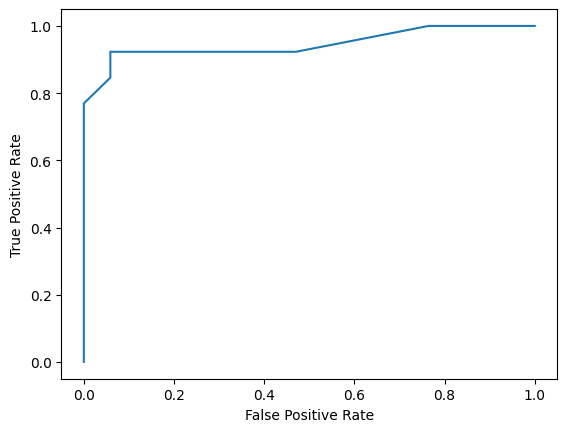

In [278]:
mod_randFor = RandomForestClassifier()
mod_randFor.fit(x_train, y_train)
pred_r = mod_randFor.predict(x_test)
cmr = confusion_matrix(y_test, pred_r)
disp = ConfusionMatrixDisplay(confusion_matrix=cmr, display_labels=mod_randFor.classes_)
disp.plot()
plt.show()
tn, fp, fn, tp = cmr.ravel()
n = tp + tn + fp + fn
accuracy = (tp + tn) / n
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)
print(accuracy, precision, recall, f1)

pred_r = mod_randFor.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, pred_r)
aucr = auc(fpr, tpr)
print(aucr)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()